In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
x = np.loadtxt('02_24_data.txt')

In [3]:
pi = np.array([0.3, 0.7])   # mixing coefficients
assert np.isclose(pi.sum(), 1), "The mixing coefficients don't add up to 1"
mu = np.array([0.3, 0.8])    # means
sigma = np.array([0.1, 0.1])  # variances

In [4]:
xx = np.linspace(0, 1, 500)
p = np.zeros((2, 500), dtype=np.float64)

In [5]:
for n in range(len(pi)):
    p[n] = pi[n] * norm.pdf(xx, loc=mu[n], scale=sigma[n])
p_gmm = p.sum(axis=0)

# K-nearest-neighbor density estimator

In [6]:
K_list = [1, 5, 30]

In [7]:
def knn(x, xx, K):
    """
    
    Args:
        x (np.array): data
        xx (np.array): query points
        K (int): number of neighbors
    
    Returns:
        density (): 
    """
    N = len(x)  # number of observations
    density = []
    d = 1  # dimension of the data
    
    for x_query in xx:
        dist = np.abs(x - x_query)
        nn_idx = np.argsort(dist)[:K]
        r = max(np.sort(dist)[:K])
        V = 2 * r  # volume of the sphere
        p = K / (N * V)  # (2.246)
        density.append(p)
    density = np.array(density)
    return density

In [8]:
def plot_knn(x, K_list):
    fig, ax = plt.subplots(3, 1, figsize=(6, 4.5))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)
    for i, k in enumerate(K_list):
        density = knn(x, xx, k)
        
        ax[i].plot(xx, density, 'b', lw=1)
        ax[i].plot(xx, p_gmm, 'g', lw=2)
        ax[i].set_xticks([0, 0.5, 1])
        ax[i].set_yticks([0, 5])
        ax[i].set_xlim(0, 1)
        ax[i].set_ylim(0, 5)
        ax[i].tick_params(labelsize=10, direction='in', which='both', right=True, top=True)
        ax[i].text(0.04, 3.8, f'K = {k}', fontsize=12)

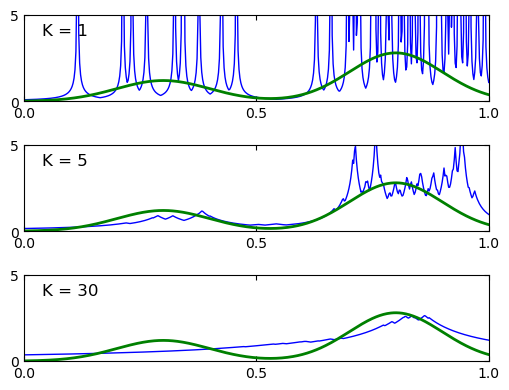

In [9]:
plot_knn(x, K_list)